In [2]:

# 3. Polynomial Regression

In [3]:
# 공부 시간에 따른 시험 점수(우등생)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stolio_Movie/ScikitLearn/PolynomialRegressionData.csv')
input_data = dataset.iloc[:,:-1].values
target_data = dataset.iloc[:,-1].values

In [6]:
# 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(input_data,target_data) # 전체 데이터로 학습

LinearRegression()

In [8]:
# 데이터 시각화(전체)

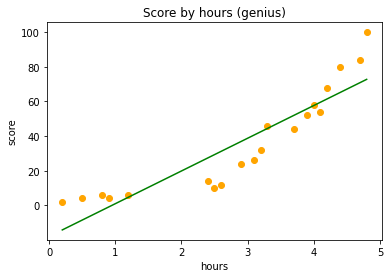

In [9]:
plt.scatter(input_data,target_data,color='orange') # 산점도
plt.plot(input_data,reg.predict(input_data),color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show()

In [10]:
reg.score(input_data,target_data)

0.8169296513411765

In [11]:
# 3-2. 다항회귀 (Polynomial Regression)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차  # 10차 일 때에는 과대적합
input_poly = poly_reg.fit_transform(input_data) # fit : feature들을 조합, transform : 변환
input_poly[:5] # feature의 확장 ([x]->[x^0 , x^1, x^2])

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [13]:
input_data[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [14]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(input_poly,target_data) # 변환된 input_data와 target_data를 가지고 모델 생성(학습)

LinearRegression()

In [16]:
# 데이터 시각화(변환된 x와 y)

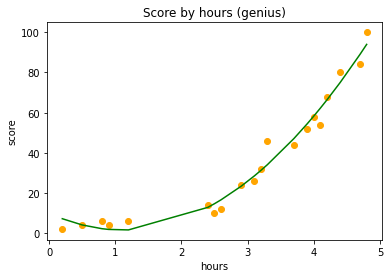

In [17]:
plt.scatter(input_data,target_data,color='orange') # 산점도
plt.plot(input_data,lin_reg.predict(poly_reg.fit_transform(input_data)),color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show() # 2차의 그래프를 그렸는데 데이터가 별로 없어서 끊겨 보인다

In [18]:
input_range = np.arange(min(input_data), max(input_data), 0.1 )   # x의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
input_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [19]:
input_range.shape

(46,)

In [20]:
input_data[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [21]:
input_range = input_range.reshape(-1,1) # row의 개수가 -1 ==> 자동으로 계산, column 개수는 1개 뭔소리야??
input_range.shape

(46, 1)

In [22]:
input_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

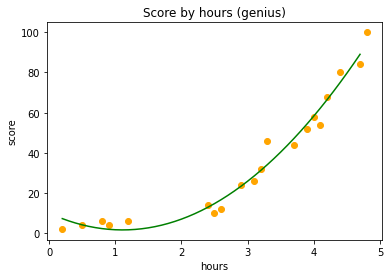

In [23]:
plt.scatter(input_data,target_data,color='orange') # 산점도
plt.plot(input_range,lin_reg.predict(poly_reg.fit_transform(input_range)),color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show() # input data를 늘여서 그래프 그리기

In [24]:
# 공부 시간에 따른 시험 성적 예측

In [25]:
reg.predict([[2]]) # 2시간을 공부 했을 때 선형 회귀 모형의 예측

array([19.85348988])

In [26]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측


array([7.05092142])

In [27]:
# 단순 선형 회귀는 점수가 80점 정도
lin_reg.score(input_poly,target_data)

0.9755457185555199